In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use('ggplot')
#sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)
sns.despine(offset=10, trim=True);

<Figure size 432x288 with 0 Axes>

In [2]:
file = "combinedFilters_csv.csv"
%time filt_df = pd.read_csv(file, delimiter=',', na_values=np.nan)
filt_df.shape

Wall time: 18.9 s


(1295116, 74)

In [3]:
filt_df.head(30)

,ESN,AVL,Vehículo,Fecha Servidor,Fecha AVL,RPM,Pedal,F. de Carga,Potencia,Estado Motor,...,Engine Operating State (bit),Engine Turbocharger 1 Compressor Inlet Pressure (kPa),Engine Protection System has Shutdown Engine (bit),Engine Protection System Approaching Shutdown (bit),Engine Protection System Timer State (bit),Engine Oil Filter Differential Pressure (Extended Range) (PSI),Engine Oil Priming Pump Control (bit),Engine Controlled Shutdown Request (bit),Engine Emergency (Immediate) Shutdown Indication (bit),Power (HP)
0,66301308,7156,CA-116,2019-06-24 14:28:36,2019-06-24 14:28:36,1880.00,100.0,100.0,3276.24,Transicion,...,15.0,0.0,0.0,3.0,3.0,3.63,3.0,0.0,0.0,3276.24
1,66301308,7156,CA-116,2019-06-24 14:29:26,2019-06-24 14:28:51,1915.50,99.2,100.0,3302.59,Transicion,...,15.0,0.0,0.0,3.0,3.0,2.18,3.0,0.0,0.0,3302.59
2,66301308,7156,CA-116,2019-06-24 14:29:26,2019-06-24 14:29:06,1897.63,98.8,100.0,3306.96,Potencia,...,15.0,0.0,0.0,3.0,3.0,5.80,3.0,0.0,0.0,3306.96
3,66301308,7156,CA-116,2019-06-24 14:29:26,2019-06-24 14:29:21,1906.75,98.8,100.0,3322.85,Potencia,...,15.0,0.0,0.0,3.0,3.0,5.08,3.0,0.0,0.0,3322.85
4,66301308,7156,CA-116,2019-06-24 14:29:41,2019-06-24 14:29:36,1915.25,99.2,100.0,3302.16,Potencia,...,15.0,0.0,0.0,3.0,3.0,0.73,3.0,0.0,0.0,3302.16
5,66301308,7156,CA-116,2019-06-24 14:30:16,2019-06-24 14:29:51,1902.88,98.8,100.0,3316.11,Potencia,...,15.0,0.0,0.0,3.0,3.0,2.90,3.0,0.0,0.0,3316.11
6,66301308,7156,CA-116,2019-06-24 14:30:16,2019-06-24 14:30:06,1902.25,99.2,100.0,3315.01,Potencia,...,15.0,0.0,0.0,3.0,3.0,3.63,3.0,0.0,0.0,3315.01
7,66301308,7156,CA-116,2019-06-24 14:40:36,2019-06-24 14:40:31,1899.38,99.2,100.0,3310.01,Transicion,...,15.0,0.0,0.0,3.0,3.0,5.08,3.0,0.0,0.0,3310.01
8,66301308,7156,CA-116,2019-06-24 14:41:26,2019-06-24 14:40:51,1900.00,99.2,100.0,3311.09,Transicion,...,15.0,0.0,0.0,3.0,3.0,3.63,3.0,0.0,0.0,3311.09
9,66301308,7156,CA-116,2019-06-24 14:41:26,2019-06-24 14:41:06,1904.75,100.0,100.0,3319.37,Potencia,...,15.0,0.0,0.0,3.0,3.0,5.80,3.0,0.0,0.0,3319.37


In [4]:
filt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295116 entries, 0 to 1295115
Data columns (total 74 columns):
 #   Column                                                          Non-Null Count    Dtype  
---  ------                                                          --------------    -----  
 0   ESN                                                             1295116 non-null  int64  
 1   AVL                                                             1295116 non-null  int64  
 2   Vehículo                                                        1295116 non-null  object 
 3   Fecha Servidor                                                  1295116 non-null  object 
 4   Fecha AVL                                                       1295116 non-null  object 
 5   RPM                                                             1295116 non-null  float64
 6   Pedal                                                           1295116 non-null  float64
 7   F. de Carga                

In [5]:
newcols = {"ESN":"ESN",
           "AVL":"AVL",
           "Vehículo":"Vehicle",
           "Fecha Servidor":"Serv Date",
           "Fecha AVL":"AVL Date",
           "RPM":"RPM",
           "Pedal":"Pedal",
           "F. de Carga":"Load F",
           "Potencia":"Power",
           "Estado Motor":"Eng state",
           "Engine Torque Mode ()":"Eng Torque Mode",
           "Actual Percent Torque (%)":"Actual Torque (%)",
           "Actual Speed (RPM)":"ActSpeed (RPM)",
           "Accelerator position (%)":"AccelPosition (%)",
           "Percent Load At Current Speed (%)":"Load at CurrSpeed (%)",
           "Fuel rate (L/h)":"Fuel rate (L/h)",
           "Barometric Pressure (PSI)":"Bar Pressure (PSI)",
           "IMP-LB (PSI)":"IMP-LB (PSI)",
           "IMT-LBF (F)":"IMT-LBF (F)",
           "EGT-AV (F)":"EGT-AV (F)",
           "Battery potential (V)":"Battery pot (V)",
           "Coolant temperature (F)":"Coolant T (F)",
           "Fuel Temperature (F)":"Fuel T (F)",
           "Engine Oil Temperature (F)":"EngOil T (F)",
           "Injector Metering (PSI)":"Inject Met (PSI)",
           "Injector Timing (PSI)":"Inj Timing (PSI)",
           "Pre-filter Oil Pressure (PSI)":"Pre-filtOil Press (PSI)",
           "Instantaneous Estimated Brake Power (HP)":"InstantEst B-Power (HP)",
           "IMT-LBR (F)":"IMT-LBR (F)",
           "IMT-RBF (F)":"IMT-RBF (F)",
           "IMT-RBR (F)":"IMT-RBR (F)",
           "IMP-RB (PSI)":"IMP-RB (PSI)",
           "IMP-RB (MCRS) (PSI)":"IMP-RB (MCRS) (PSI)",
           "Oil Differential Pressure (PSI)":"OilDiff Press (PSI)",
           "Ecu temperature (F)":"Ecu T (F)",
           "EGT-01 (F)":"EGT-01 (F)",
           "EGT-02 (F)":"EGT-02 (F)",
           "EGT-03 (F)":"EGT-03 (F)",
           "EGT-04 (F)":"EGT-04 (F)",
           "EGT-05 (F)":"EGT-05 (F)",
           "EGT-06 (F)":"EGT-06 (F)",
           "EGT-07 (F)":"EGT-07 (F)",
           "EGT-08 (F)":"EGT-08 (F)",
           "EGT-09 (F)":"EGT-09 (F)",
           "EGT-10 (F)":"EGT-10 (F)",
           "EGT-11 (F)":"EGT-11 (F)",
           "EGT-12 (F)":"EGT-12 (F)",
           "EGT-13 (F)":"EGT-13 (F)",
           "EGT-14 (F)":"EGT-14 (F)",
           "EGT-15 (F)":"EGT-15 (F)",
           "EGT-16 (F)":"EGT-16 (F)",
           "Crankcase Pressure (HPI) (in-H2O)":"CC Press (HPI) (in-H2O)",
           "Engine Oil Level (%)":"EngOil Level (%)",
           "Post Oil Filter (PSI)":"PostOil Filt (PSI)",
           "Rifle Oil Pressure (PSI)":"RifleOil Press (PSI)",
           "Coolant Pressure (PSI)":"Coolant Press (PSI)",
           "Ambient Temperature (F)":"Ambient T (F)",
           "EGT-17 (F)":"EGT-17 (F)",
           "EGT-18 (F)":"EGT-18 (F)",
           "IMT-LBM (F)":"IMT-LBM (F)",
           "IMT-RBM (F)":"IMT-RBM (F)",
           "Remote accelerator pedal position (%)":"RemoAccelPedal Pos (%)",
           "Engine Pre-filter Oil Pressure (Extended Range) (PSI)":"EngPre-filterOil Pres (Extended) (PSI)",
           "Post Oil Filter (Extended Range) (PSI)":"PostOilFilt (Extended) (PSI)",
           "Engine Operating State (bit)":"EngOp State (bit)",
           "Engine Turbocharger 1 Compressor Inlet Pressure (kPa)":"EngTcharger 1 CompInlet Press (kPa)",
           "Engine Protection System has Shutdown Engine (bit)":"EngProSyst SD Eng (bit)",
           "Engine Protection System Approaching Shutdown (bit)":"EngProSyst App SD (bit)",
           "Engine Protection System Timer State (bit)":"EngProSys TS (bit)",
           "Engine Oil Filter Differential Pressure (Extended Range) (PSI)":"EngOilFiltDiff Press (Extended) (PSI)",
           "Engine Oil Priming Pump Control (bit)":"EngOilPrPump Control (bit)",
           "Engine Controlled Shutdown Request (bit)":"EngControlled SD Request (bit)",
           "Engine Emergency (Immediate) Shutdown Indication (bit)":"EngE (Immediate) SD Ind (bit)",
           "Power (HP)":"Power (HP)"}

In [6]:
len(newcols)

74

In [7]:
filt_df.rename(columns=newcols, inplace=True)
filt_df.columns.values

array(['ESN', 'AVL', 'Vehicle', 'Serv Date', 'AVL Date', 'RPM', 'Pedal',
       'Load F', 'Power', 'Eng state', 'Eng Torque Mode',
       'Actual Torque (%)', 'ActSpeed (RPM)', 'AccelPosition (%)',
       'Load at CurrSpeed (%)', 'Fuel rate (L/h)', 'Bar Pressure (PSI)',
       'IMP-LB (PSI)', 'IMT-LBF (F)', 'EGT-AV (F)', 'Battery pot (V)',
       'Coolant T (F)', 'Fuel T (F)', 'EngOil T (F)', 'Inject Met (PSI)',
       'Inj Timing (PSI)', 'Pre-filtOil Press (PSI)',
       'InstantEst B-Power (HP)', 'IMT-LBR (F)', 'IMT-RBF (F)',
       'IMT-RBR (F)', 'IMP-RB (PSI)', 'IMP-RB (MCRS) (PSI)',
       'OilDiff Press (PSI)', 'Ecu T (F)', 'EGT-01 (F)', 'EGT-02 (F)',
       'EGT-03 (F)', 'EGT-04 (F)', 'EGT-05 (F)', 'EGT-06 (F)',
       'EGT-07 (F)', 'EGT-08 (F)', 'EGT-09 (F)', 'EGT-10 (F)',
       'EGT-11 (F)', 'EGT-12 (F)', 'EGT-13 (F)', 'EGT-14 (F)',
       'EGT-15 (F)', 'EGT-16 (F)', 'CC Press (HPI) (in-H2O)',
       'EngOil Level (%)', 'PostOil Filt (PSI)', 'RifleOil Press (PSI)',
       'Co

In [8]:
np.any(filt_df.iloc[:,5:]==np.nan)

False

In [9]:
filt_df["Vehicle"].unique()

array(['CA-116', 'CA-117', 'CA-119', 'CA-126', 'CA-129', 'CA-130',
       'CA-150', 'CA-155', 'CA-161', 'CA-57', 'CA-64', 'CA-87', 'CA-88',
       'CA-94', 'CA-97'], dtype=object)

In [10]:
filt_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ESN,1295116.0,6.630267e+07,1400.005351,66300987.00,66301308.00,66302417.00,66304318.00,66304554.00
AVL,1295116.0,7.152224e+03,89.909166,7001.00,7138.00,7152.00,7177.00,102133.00
RPM,1295116.0,1.901239e+03,9.153357,1865.25,1896.25,1901.38,1906.25,1978.38
Pedal,1295116.0,9.951305e+01,0.485696,95.20,99.20,99.20,100.00,100.00
Load F,1295116.0,9.999038e+01,0.115289,98.00,100.00,100.00,100.00,100.00
...,...,...,...,...,...,...,...,...
EngOilFiltDiff Press (Extended) (PSI),1254646.0,3.668100e+00,2.322823,0.00,2.18,3.63,5.08,15.95
EngOilPrPump Control (bit),1261217.0,3.000000e+00,0.000000,3.00,3.00,3.00,3.00,3.00
EngControlled SD Request (bit),1261217.0,0.000000e+00,0.000000,0.00,0.00,0.00,0.00,0.00
EngE (Immediate) SD Ind (bit),1261217.0,0.000000e+00,0.000000,0.00,0.00,0.00,0.00,0.00


Wall time: 10.2 s


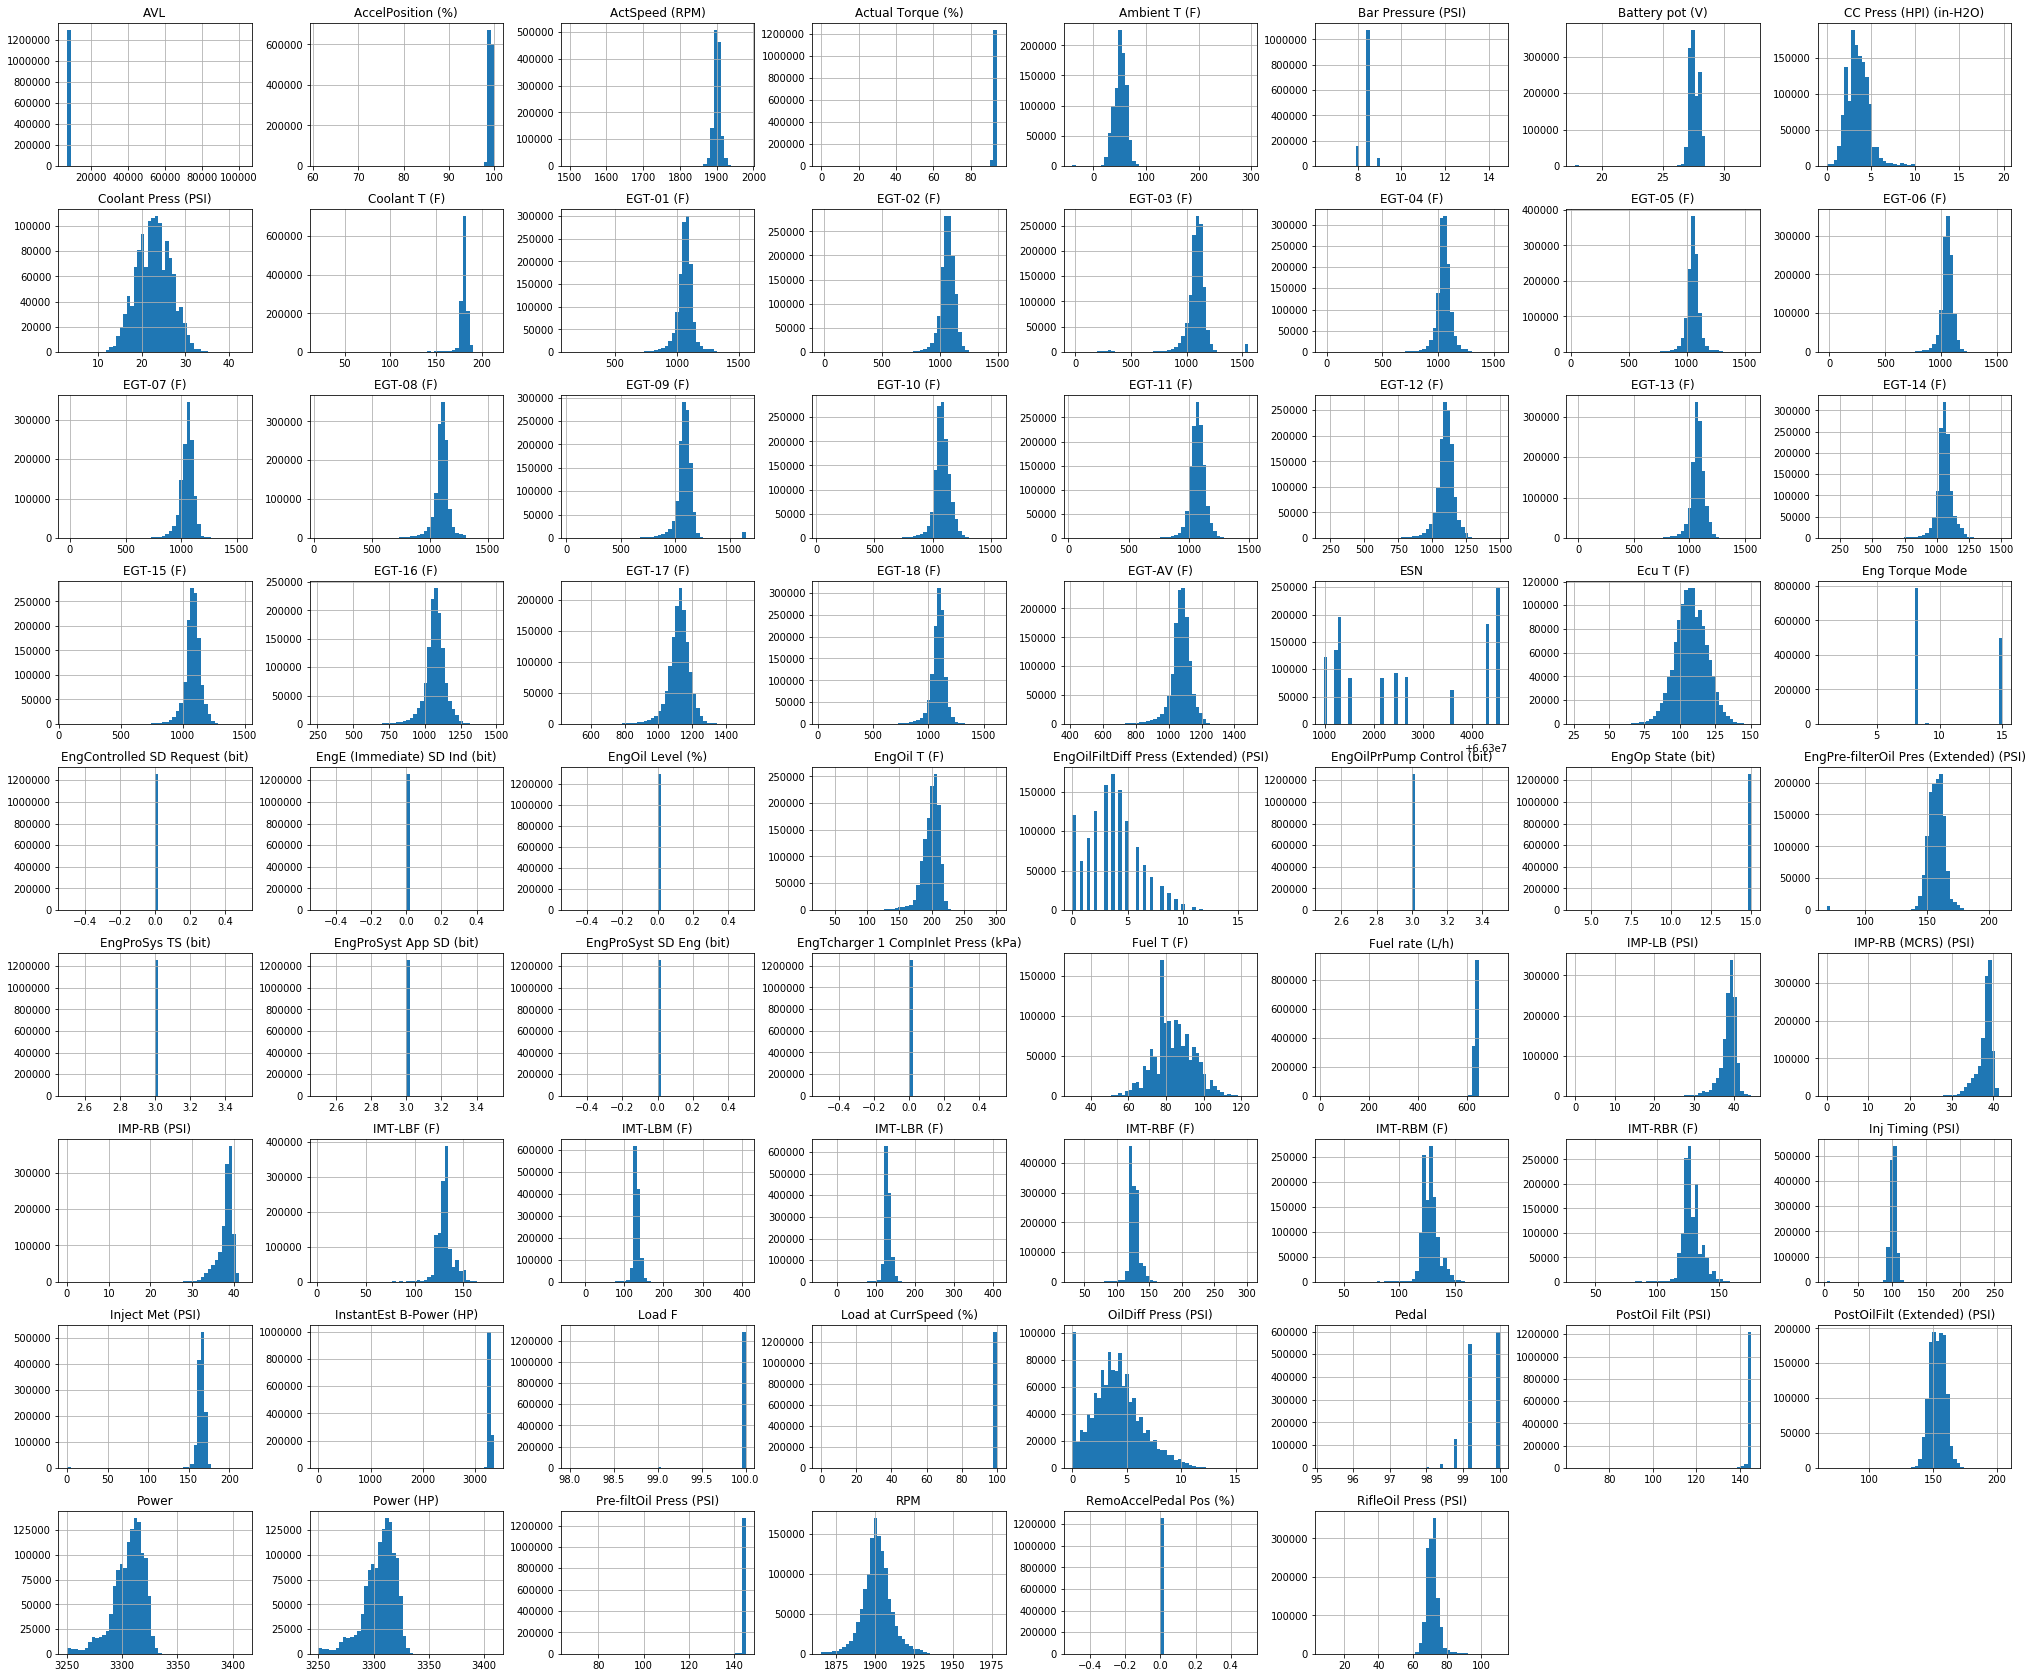

In [11]:
%time filt_df.hist(bins=50, figsize=(35,30))
plt.show()

In [12]:
cols2drop =['ESN','AVL','RPM', 'Pedal', 'Load F','Power','Eng Torque Mode', 
            'Actual Torque (%)', 'ActSpeed (RPM)', 'AccelPosition (%)',
           'Load at CurrSpeed (%)', 'Fuel rate (L/h)', 'Bar Pressure (PSI)',
           'IMP-LB (PSI)','Battery pot (V)','Inject Met (PSI)',
           'Inj Timing (PSI)', 'Pre-filtOil Press (PSI)',
           'InstantEst B-Power (HP)','IMP-RB (PSI)', 'IMP-RB (MCRS) (PSI)',
           'OilDiff Press (PSI)','CC Press (HPI) (in-H2O)',
           'EngOil Level (%)', 'PostOil Filt (PSI)', 'RifleOil Press (PSI)',
           'Coolant Press (PSI)', 'RemoAccelPedal Pos (%)',
           'EngPre-filterOil Pres (Extended) (PSI)',
           'PostOilFilt (Extended) (PSI)', 'EngOp State (bit)',
           'EngTcharger 1 CompInlet Press (kPa)', 'EngProSyst SD Eng (bit)',
           'EngProSyst App SD (bit)', 'EngProSys TS (bit)',
           'EngOilFiltDiff Press (Extended) (PSI)',
           'EngOilPrPump Control (bit)', 'EngControlled SD Request (bit)',
           'EngE (Immediate) SD Ind (bit)', 'Power (HP)']

In [13]:
filt_df_F = filt_df.drop(cols2drop, axis=1)
filt_df_F.shape

(1295116, 34)

In [14]:
filt_df_F.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
IMT-LBF (F),1288420.0,130.510494,9.804740,1.40,125.60,131.00,134.60,181.40
EGT-AV (F),1275153.0,1073.627969,61.655083,413.71,1047.31,1077.91,1108.18,1484.26
Coolant T (F),1295066.0,179.579199,6.924781,21.20,177.80,179.60,181.40,213.80
Fuel T (F),1295072.0,84.088966,10.652964,30.20,77.00,84.20,91.40,123.80
EngOil T (F),1285704.0,199.160902,13.203795,29.19,192.09,201.48,208.29,301.10
IMT-LBR (F),1288334.0,129.503652,8.542948,-40.00,125.60,129.20,132.80,410.00
IMT-RBF (F),1288469.0,126.788582,7.687533,32.00,122.00,125.60,131.00,302.00
IMT-RBR (F),1288487.0,127.896038,8.008955,33.80,123.80,127.40,131.00,176.00
Ecu T (F),1255086.0,107.784965,11.157056,26.09,100.34,107.83,115.19,150.24
EGT-01 (F),1277236.0,1064.533036,67.673885,135.61,1037.08,1069.70,1099.51,1553.00


Wall time: 4.59 s


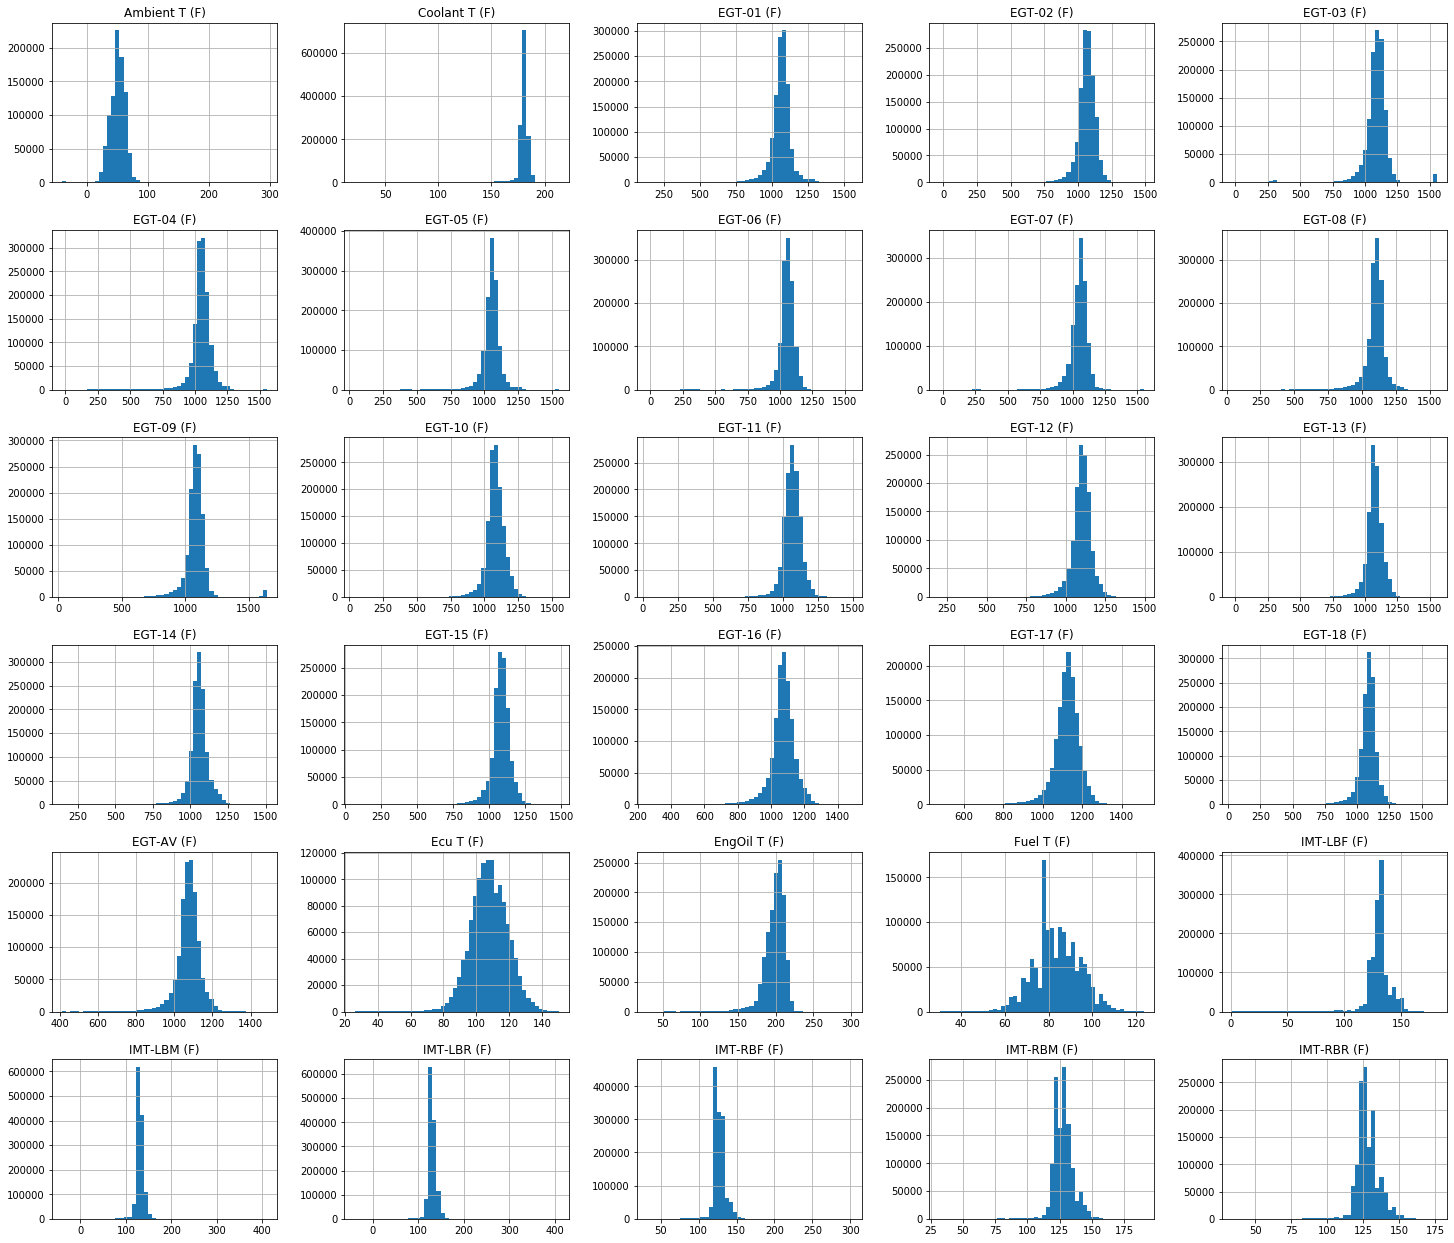

In [15]:
%time filt_df_F.hist(bins=50, figsize=(25,22))
plt.show()

In [16]:
excelfile = "weight_effectiveHour.xlsx"
weights_df = pd.read_excel(excelfile, sheet_name="Filter_weight")
effhours_df = pd.read_excel(excelfile, sheet_name="Effective_hours")
df = pd.concat([effhours_df, weights_df["PESO FILTRO (kg)"]], axis=1)
df

,CAEX,HRS,PESO FILTRO (kg)
0,CA116,2275,2.27
1,CA117,550,1.89
2,CA119,3124,2.82
3,CA126,1237,2.26
4,CA129,1486,2.31
5,CA130,3321,1.92
6,CA150,2007,2.17
7,CA155,533,2.08
8,CA161,896,2.25
9,CA57,1581,2.30


In [17]:
vehicles = [filt_df_F.Vehicle.unique()[i] for i in range(15)]

In [18]:
np.sum(filt_df_F.Vehicle == vehicles[0])

116765

In [19]:
%time effhours = pd.Series(np.hstack([np.repeat(df["HRS"].iloc[i], np.sum(filt_df_F.Vehicle == vehicles[i])) for i in range(df.shape[0])]).flatten())

Wall time: 2.38 s


In [20]:
%time filtweights = pd.Series(np.hstack([np.repeat(df["PESO FILTRO (kg)"].iloc[i], np.sum(filt_df_F.Vehicle == vehicles[i])) for i in range(df.shape[0])]).flatten())

Wall time: 2.69 s


In [21]:
filt_df_F["Eff HRS (h)"] = effhours
filt_df_F["Filter Mass (kg)"] = filtweights
filt_df_F.head()

,Vehicle,Serv Date,AVL Date,Eng state,IMT-LBF (F),EGT-AV (F),Coolant T (F),Fuel T (F),EngOil T (F),IMT-LBR (F),...,EGT-14 (F),EGT-15 (F),EGT-16 (F),Ambient T (F),EGT-17 (F),EGT-18 (F),IMT-LBM (F),IMT-RBM (F),Eff HRS (h),Filter Mass (kg)
0,CA-116,2019-06-24 14:28:36,2019-06-24 14:28:36,Transicion,123.8,766.96,177.8,84.2,178.42,123.8,...,867.54,812.08,718.59,80.6,786.09,857.75,123.8,118.4,2275,2.27
1,CA-116,2019-06-24 14:29:26,2019-06-24 14:28:51,Transicion,123.8,974.30,179.6,84.2,179.88,122.0,...,1004.90,982.40,959.56,73.4,1016.38,1025.71,122.0,116.6,2275,2.27
2,CA-116,2019-06-24 14:29:26,2019-06-24 14:29:06,Potencia,125.6,1010.86,179.6,84.2,180.16,123.8,...,1022.11,1014.80,1007.71,69.8,1059.13,1046.64,125.6,120.2,2275,2.27
3,CA-116,2019-06-24 14:29:26,2019-06-24 14:29:21,Potencia,129.2,1027.18,179.6,84.2,184.04,127.4,...,1032.80,1031.34,1031.34,68.0,1079.71,1060.59,129.2,123.8,2275,2.27
4,CA-116,2019-06-24 14:29:41,2019-06-24 14:29:36,Potencia,131.0,1035.16,179.6,84.2,185.96,127.4,...,1037.19,1040.11,1046.08,66.2,1094.34,1068.24,129.2,123.8,2275,2.27


Wall time: 5.48 s


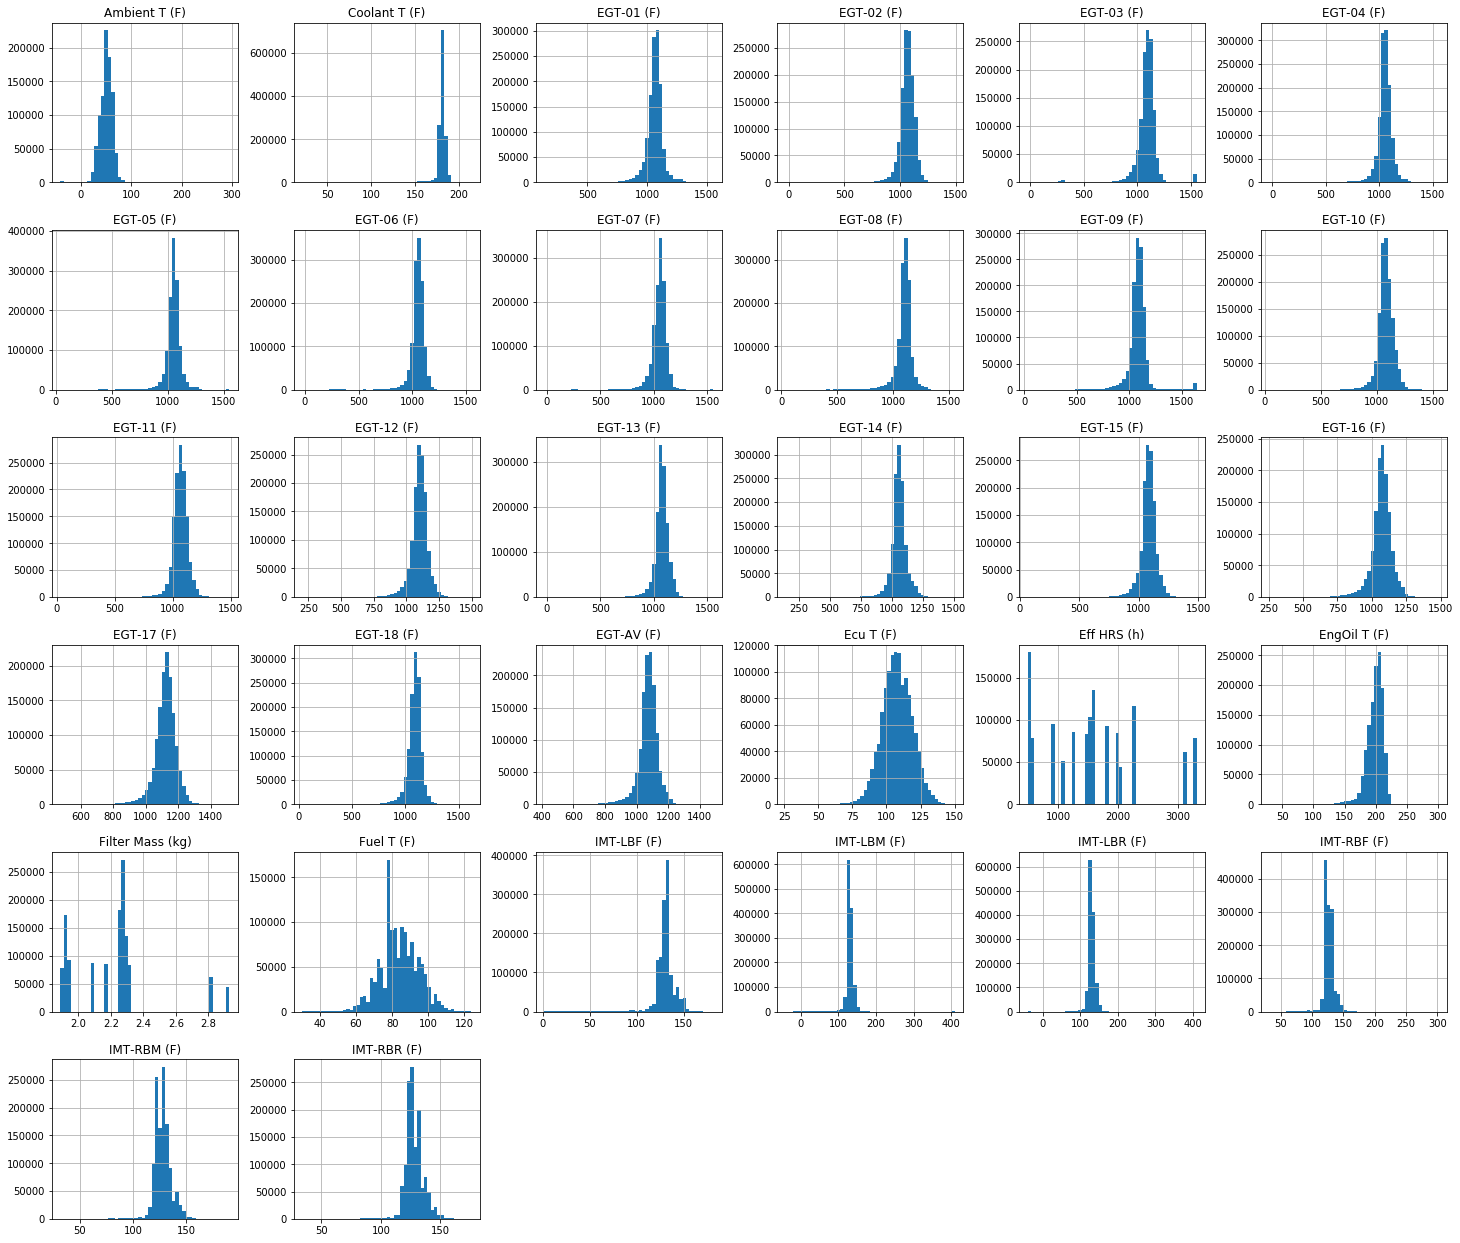

In [22]:
%time filt_df_F.hist(bins=50, figsize=(25,22))
plt.show()

In [23]:
corr_matrix = filt_df_F.corr()

In [24]:
%time corr_matrix["Filter Mass (kg)"].sort_values(ascending=False)

Wall time: 1.03 ms


Filter Mass (kg)    1.000000
Eff HRS (h)         0.348691
EGT-07 (F)          0.024871
EngOil T (F)       -0.034376
EGT-06 (F)         -0.059642
EGT-17 (F)         -0.062868
EGT-08 (F)         -0.073271
Coolant T (F)      -0.074039
EGT-18 (F)         -0.077212
EGT-03 (F)         -0.077946
EGT-05 (F)         -0.080837
EGT-13 (F)         -0.085669
IMT-LBM (F)        -0.086884
EGT-02 (F)         -0.088963
EGT-10 (F)         -0.095373
EGT-04 (F)         -0.109585
EGT-12 (F)         -0.115139
EGT-AV (F)         -0.118544
Ecu T (F)          -0.122552
EGT-11 (F)         -0.124928
EGT-14 (F)         -0.134035
IMT-RBF (F)        -0.137809
IMT-LBR (F)        -0.137827
EGT-15 (F)         -0.147152
EGT-09 (F)         -0.151416
EGT-16 (F)         -0.162537
IMT-RBM (F)        -0.171616
Ambient T (F)      -0.183835
IMT-LBF (F)        -0.183954
Fuel T (F)         -0.184561
EGT-01 (F)         -0.194793
IMT-RBR (F)        -0.233164
Name: Filter Mass (kg), dtype: float64

In [25]:
#from pandas.plotting import scatter_matrix

Wall time: 846 ms


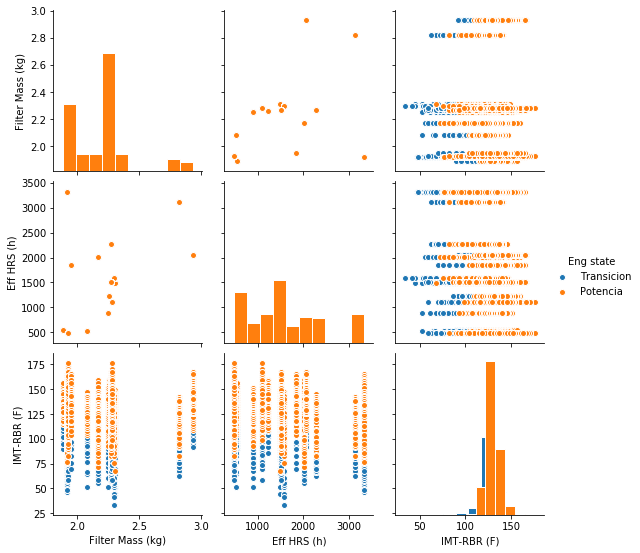

In [25]:
attributes = ["Filter Mass (kg)", "Eff HRS (h)", "IMT-RBR (F)", 'Eng state']
%time g = sns.PairGrid(filt_df_F[attributes], hue="Eng state")
g.map_diag(plt.hist, edgecolor="white")
g.map_offdiag(plt.scatter, edgecolor="white")
g.add_legend();

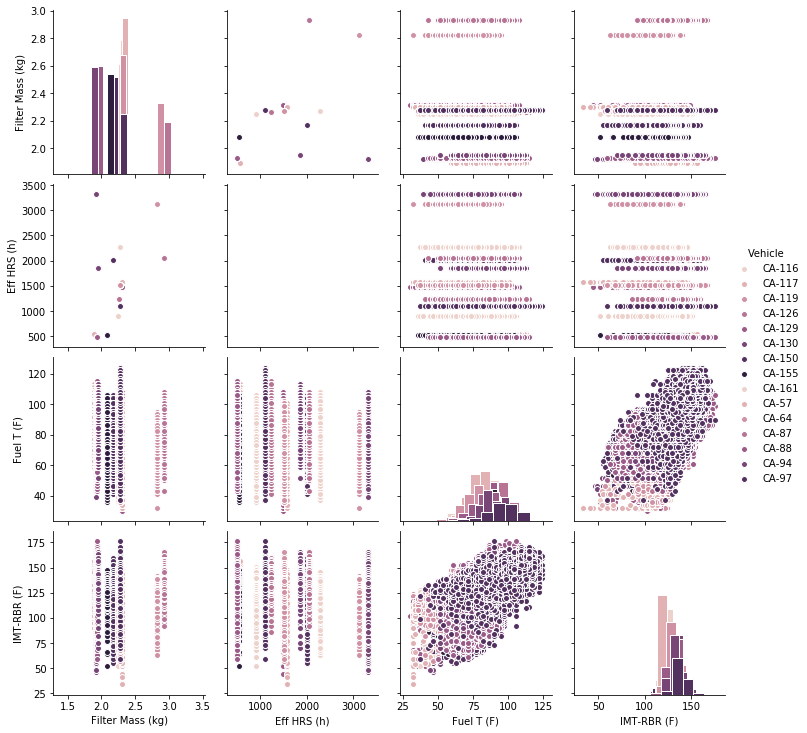

In [31]:
attributes = ["Filter Mass (kg)", "Eff HRS (h)", "Fuel T (F)", "IMT-RBR (F)",'Vehicle']

g = sns.PairGrid(filt_df_F[attributes], hue="Vehicle", palette=sns.cubehelix_palette(8))
g.map_diag(plt.hist, edgecolor="white")
g.map_offdiag(plt.scatter, edgecolor="white")
g.add_legend();

In [26]:
filt_grouped_df_F = filt_df_F.groupby(["Vehicle"]).mean()

In [27]:
filt_grouped_df_F

,IMT-LBF (F),EGT-AV (F),Coolant T (F),Fuel T (F),EngOil T (F),IMT-LBR (F),IMT-RBF (F),IMT-RBR (F),Ecu T (F),EGT-01 (F),...,EGT-14 (F),EGT-15 (F),EGT-16 (F),Ambient T (F),EGT-17 (F),EGT-18 (F),IMT-LBM (F),IMT-RBM (F),Eff HRS (h),Filter Mass (kg)
Vehicle,,,,,,,,,,,,,,,,,,,,,
CA-116,128.011736,1042.096329,179.506443,84.167627,198.700968,127.069721,123.358590,122.852774,105.950137,1038.330387,...,1035.516827,1041.403898,1065.028461,52.616563,1101.642912,1069.967503,128.754428,122.788322,2275,2.27
CA-117,137.170276,1072.894482,182.458791,95.889914,202.877612,135.591488,129.709934,131.428945,117.539385,1080.831219,...,1057.184324,1084.411936,1077.401215,44.611960,1139.012776,1094.457403,134.991763,131.077298,550,1.89
CA-119,125.998579,1059.446023,179.390438,74.187324,198.432320,126.427888,124.791351,121.265118,102.536883,1052.133231,...,1043.786718,1051.452507,1045.778889,10.686726,1112.462823,1069.822903,124.867314,122.506467,3124,2.82
CA-126,134.281122,1104.310698,183.714298,93.314878,208.955224,132.894082,127.941002,130.052458,117.979798,1081.484524,...,1065.560718,1094.070325,1119.101540,57.958298,1165.073535,1131.465888,131.546410,128.178399,1237,2.26
CA-129,122.035529,1082.738989,180.552254,86.378109,199.988536,126.833026,124.462994,125.049812,110.599621,1076.206080,...,1038.635926,1109.070454,1083.579727,49.778046,1118.209494,1066.630869,130.763456,128.083601,1486,2.31
CA-130,131.278615,1134.806364,181.616417,84.471398,203.390953,129.597683,127.225473,129.846383,110.646472,1103.787058,...,1158.979056,1158.734037,1161.589583,54.466829,1185.997741,1150.367907,130.065418,127.785093,3321,1.92
CA-150,127.129062,1080.526313,179.430318,78.781087,203.435452,125.766017,123.357559,122.995653,101.670318,1083.984557,...,1064.300443,1093.405247,1038.964519,43.229226,1119.701455,1103.935551,127.873167,126.545673,2007,2.17
CA-155,128.597622,1112.808126,177.850850,83.187714,196.443343,127.662564,126.337901,127.904121,105.408981,1127.311632,...,1105.760810,1129.664169,1101.021987,50.614033,1144.156769,1088.410983,125.751650,125.361657,533,2.08
CA-161,127.363300,1035.210165,166.573284,77.958801,181.006898,123.398071,122.566146,124.491401,101.552286,1041.590834,...,988.507159,1052.599147,1013.809176,47.199259,1074.020063,1028.093065,126.565945,123.525796,896,2.25


In [28]:
corr_matrix = filt_grouped_df_F.corr()

In [29]:
%time corr_matrix["Filter Mass (kg)"].sort_values(ascending=False)

Wall time: 0 ns


Filter Mass (kg)    1.000000
EGT-18 (F)          0.500379
Eff HRS (h)         0.384693
EGT-07 (F)          0.130795
EngOil T (F)       -0.051062
Coolant T (F)      -0.079514
IMT-LBR (F)        -0.131656
IMT-LBM (F)        -0.132854
EGT-17 (F)         -0.135938
EGT-03 (F)         -0.144896
EGT-06 (F)         -0.156426
EGT-10 (F)         -0.158948
EGT-13 (F)         -0.166234
EGT-02 (F)         -0.193317
EGT-05 (F)         -0.195475
IMT-RBF (F)        -0.200307
EGT-11 (F)         -0.204522
EGT-14 (F)         -0.204928
EGT-12 (F)         -0.206514
EGT-08 (F)         -0.231964
Fuel T (F)         -0.258107
EGT-AV (F)         -0.262096
IMT-RBM (F)        -0.263633
EGT-15 (F)         -0.269367
Ecu T (F)          -0.280451
EGT-04 (F)         -0.281784
IMT-LBF (F)        -0.287588
IMT-RBR (F)        -0.338139
EGT-16 (F)         -0.345354
EGT-01 (F)         -0.457562
Ambient T (F)      -0.519295
EGT-09 (F)         -0.667044
Name: Filter Mass (kg), dtype: float64

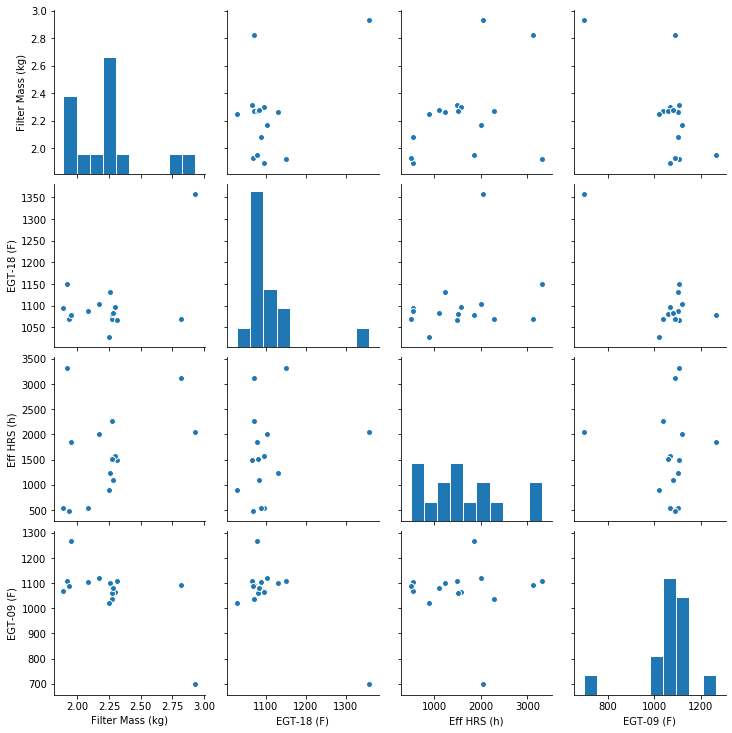

In [30]:
attributes = ["Filter Mass (kg)", "EGT-18 (F)", 'Eff HRS (h)', "EGT-09 (F)"]

g = sns.PairGrid(filt_grouped_df_F[attributes])
g.map_diag(plt.hist, edgecolor="white")
g.map_offdiag(plt.scatter, edgecolor="white");